# Trabajo Práctico N°1

* Transformaciones puntuales
   * Transformaciones a niveles de gris
   
Todos los ejercicios están en el [siguiente repositorio](https://github.com/PaPablo/pdi-mdp)

## Ejercicio 1

1. Utilizando la función **imread**, cargue en memoria alguna de las imágenes provistas. Incluya el parámetro del mapa de colores. Resuelva:
   1. Visualice los valores de la matriz imagen y del mapa de color utilizando el editor de variables (variable editor).
   2. Muestre la matriz imagen utilizando la función imshow.
   3. Ahora grafique la matriz imagen como una superficie utilizando la función mesh. ¿Qué representa la altura de la superficie?
   4. ¿Cuál es el máximo nivel de intensidad en la imagen cargada? ¿Cuál es el mínimo? ¿Cuál es la resolución de la imagen? Resuelva usando funciones de MatLab®.

In [1]:
# Notebook magic para poder hacer visualizaciones en las celdas
%matplotlib inline

# Importamos imageio
import imageio

# Numpy para array and matrix operations
import numpy as np

# Imprortamos matplotlib para poder visualizar
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Divido por 255 para que la imagen quede en el rango [0;1]
im = imageio.imread('data/FETLOCK.TIF')


In [3]:
# Visualizar el mapa de color de la imagen
im[:8,:8]

Array([[231, 238, 240, 241, 241, 241, 240, 223],
       [233, 238, 238, 241, 240, 236, 196, 150],
       [233, 238, 239, 240, 234, 175, 149, 153],
       [234, 237, 238, 234, 175, 154, 153, 152],
       [233, 237, 236, 192, 154, 153, 152, 149],
       [233, 236, 203, 156, 154, 152, 148, 146],
       [232, 230, 160, 155, 153, 148, 148, 146],
       [230, 184, 156, 152, 149, 148, 148, 147]], dtype=uint8)

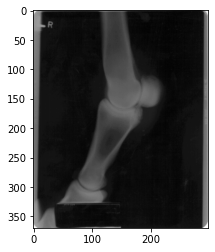

In [4]:
# Visualizamos imagen
plt.imshow(im, cmap='gray')

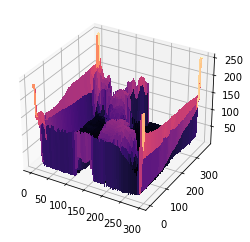

In [5]:
# Visualizar mesh de la imagen
h, w  = im.shape
X = np.arange(0,w,1)
Y = np.arange(0,h, 1)
X, Y = np.meshgrid(X,Y)
Z = im

fig = plt.figure()
ax = fig.gca(projection='3d')

surface = ax.plot_surface(X, Y,Z, cmap=cm.magma,
                       linewidth=0, antialiased=False)

In [6]:
min_im = im.min() # Mínimo valor de intensidad
max_im = im.max() # Máximo valord de intensidad
(height_im, width_im) = im.shape # Resoluciónd de la imagen
print('================================')
print(f'Mínimo valor: {min_im}')
print(f'Máximo valor: {max_im}')
print(f'Resolución de la imagen: {height_im}x{width_im}')
print('================================')

Mínimo valor: 2
Máximo valor: 255
Resolución de la imagen: 370x297


## Ejercicio 2 

Programe las siguientes técnicas de realce:
* Negativo
* Contrast Stretching
* Compresión de rango dinámico
* Gray - level slicing
* Bit-plane slicing.

In [7]:
def negative(im):
    return 255 - im

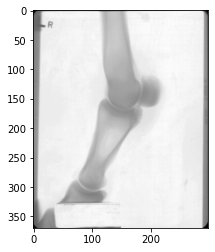

In [8]:
plt.imshow(negative(im),cmap='gray')

In [116]:
def lineal(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    def f(x):
        m = (y2 - y1)/(x2-x1)
        b = y1 - (x1*m)
        return m*x + b
    return f

def lineal_by_parts(parts):
    def f(x):
        index = 0
        for i,p in enumerate(parts[:-1]):
            
            if p[0] > x:
                break
            index = i
        return lineal(parts[index], parts[index+1])(x)
    return f

def contrast_stretch(im, p1,p2):
    x1,y1 = p1
    x2,y1 = p2
    norm_im = im / 255
    out_im = norm_im.copy()
    
    parts = [(0,0), p1, p2, (1,1)]
    for i, row in enumerate(norm_im):
        for j, col in enumerate(row):
            out_im[i][j] = lineal_by_parts(parts)(norm_im[i][j])
    return out_im

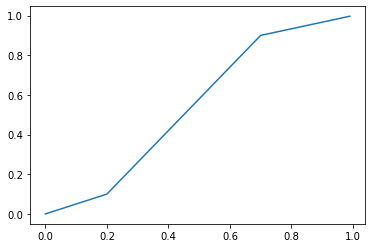

In [117]:
f = lineal_by_parts([(0,0),(.2,.1),(.7,.9), (1,1)])
xs = np.arange(0,1, 0.01)
ys = [f(x) for x in xs]
 
fig, ax = plt.subplots()

plt.plot(xs,ys)

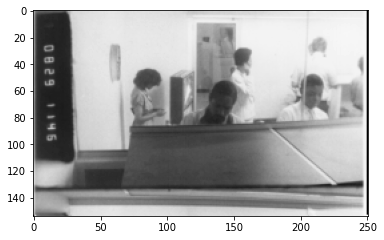

In [122]:
plt.imshow(contrast_stretch(im, (.3,.01),(.9,.9)),vmin=0, vmax=1, cmap='gray')

In [11]:
def dynamic_range_compression(im, c=1):
    s = c*np.log(1+(im/255))
    return np.clip(s,0,1)

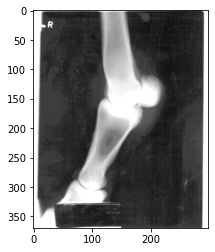

In [12]:
plt.imshow(dynamic_range_compression(im,3),vmin=0, vmax=1,cmap='gray')

In [13]:
def gray_level_slicing(im,lower=0, upper=1):
    s = im.copy() / 255
    s[s <= lower] = 0
    s[s >= upper] = 0
    s[(s > lower) & (s < upper)] = 1
    return (im/255) +s

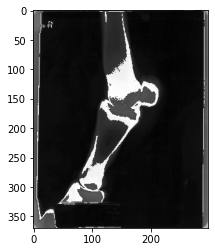

In [14]:
plt.imshow(gray_level_slicing(im, .3, .4), cmap='gray')

In [15]:
def bit_plane_slice(im, bit_number):
    return im & (2**(bit_number-1))

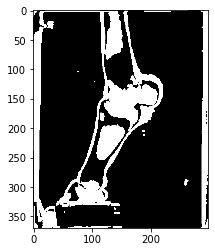

In [16]:
plt.imshow(bit_plane_slice(im, 6), vmin=0, vmax=1, cmap='gray')

## Ejercicio 3

Para las técnicas programadas en el ejercicio anterior explique brevemente bajo qué circunstancias (qué características del histograma de la imagen) aplicaría cada una. En los casos de que existan: ¿Cómo definiría los valores de sus parámetros? Fundamente.

---

En el caso del negativo, sería útil usarlo cuando la imagen es objeto oscuro sobre fondo claro. Al aplicar el negativo se obtiene una imagen oscura con objeto claro, en la cual es más fácil distinguir detalles.

El estiramiento del contraste es interesante aplicarlo en imágenes de poco constraste, que parecen *palidas*, obteniendo así una diferencia más marcada entre los tonos de gris, permitiendo distinguir mejor qué objetos hay en la imagen. Utilizaría 0 y 1 como umbrales inferiores y superiores respectivamente, logrando así que la imágen ocupe todo el rango posible de intensidades.

El caso contrario es el de la compresión del rango dinámico, ya que lo que se intenta acá es acentuar la diferencia entre las variaciones cercanas, obteniendo una imágen donde se observan visiblemente cambios que en la imagen sin procesar no se distinguían. Como constante tomaría un valor algo alto, por ejemplo 5, que acentúa las diferencias entre los valores de gris.

El slicing a nivel de gris es muy útil para segmentar regiones con valores uniformes en su intensidad. El valor a utilzar depende del caso particular.

Es slicin a nivel de bit es interesante en imágenes con bordes definidos y de un solo nivel de gris. Usaría un bit alto, ya que por esos valores de encuentran los cambiós más significativos en los niveles de intensidad.

## Ejercicio 4

Para las técnicas *Contrast Stretching* analice los resultados que se obtienen al variar sus parámetros, considerando en qué zonas del espacio de niveles de gris se produce un estiramiento y en cuáles una compresión. Fundamente.

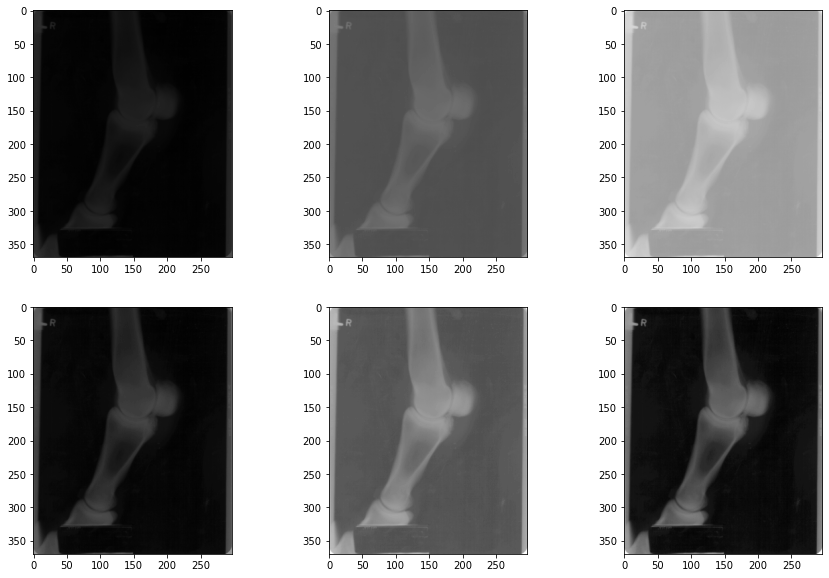

In [17]:
fig, axs = plt.subplots(2,3, figsize=(15,10))

axs[0,0].imshow(contrast_stretch(im, lower=0, upper=.3), vmin=0, vmax=1, cmap='gray')
axs[0,1].imshow(contrast_stretch(im, lower=.3, upper=.6), vmin=0, vmax=1, cmap='gray')
axs[0,2].imshow(contrast_stretch(im, lower=.6, upper=1), vmin=0, vmax=1, cmap='gray')
axs[1,0].imshow(contrast_stretch(im, lower=0, upper=.6), vmin=0, vmax=1, cmap='gray')
axs[1,1].imshow(contrast_stretch(im, lower=.3, upper=1), vmin=0, vmax=1, cmap='gray')
axs[1,2].imshow(contrast_stretch(im, lower=0, upper=1), vmin=0, vmax=1, cmap='gray')
plt.show()

A medida que desciende el valor inferior se obtiene más nitidez, junto con un descenso en la intensidad de los valores de gris. Y a medida que el valor superior asciende se obtiene más nitidez para los valores más altos. Resultando en que mientras más distancia haya entre el valor inferior y superior, más rango de intensidades habrá junto con más nitidez.

Cuando los valores están muy juntos se pierde nitidez y si los valores son cercanos a uno se pierde mucho contraste.

## Ejercicio 5

¿Para qué casos especiales, las funciones del ejercicio 1 producen un umbralamiento de la imagen?

---

Las funciones de slicing, ya sea a nivel de grises o a nivel de bits. Ya que terminan generando una imagen con cantidad reducida de niveles de gris, usualmente dos.

## Ejercicio 6

Programa la función de umbralamiento.

In [18]:
def threshold(im, thresh=.5):
    s = im.copy()/255
    s[s > thresh] = 1
    s[s<= thresh] =0
    return s
    

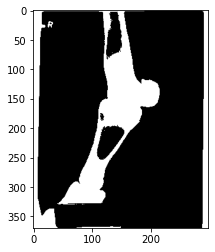

In [19]:
plt.imshow(threshold(im, .25), cmap='gray')

## Ejercicio 7

Programe los siguientes algoritmos

1. Cálculo del histograma de una imagen (debe ingresar la matriz imagen y devolverse un vector).
1. Gráfico del histograma de una imagen (esta función debe tomar como dato el vector que devuelve la función anterior).
1. Ecualización lineal del histograma

In [20]:
# Cálculo del histograma
def image_histogram(im, bins=10):
    dx = 1 / bins

    dxs = [b*(dx) for b in range(bins+1)]
    ranges = [z for z in zip(dxs[:-1], dxs[1:])]

    h,w = im.shape
    im1d = im.reshape(h*w) / 255

    hist = np.zeros((bins))
    
    
    def get_interval_check(lower, upper):
        
        def start_case(v):
            return v>=lower and v <= upper
        def non_start_case(v):
            return v>lower and v<=upper

        if lower == 0:
            return start_case
        else:
            return non_start_case


    for p in im1d:
        for i, r in enumerate(ranges):
            if get_interval_check(*r)(p):
                hist[i] += 1
    
    return hist, dxs

In [21]:
def plot_histogram(im, n_interval = 10):
    hist, bins = image_histogram(im, bins=n_interval)
    h,w = im.shape
    number_of_pixels = h*w
    percent = [(height/number_of_pixels)*100 for height in hist]

    cdf = hist.cumsum()
    norm_cdf = cdf/cdf.max()

    fig, ax = plt.subplots(1, 2, figsize=(15,10))
    ax[0].imshow(im, cmap='gray')
    ax2 = ax[1].twinx()
    ax2.plot(np.arange(0,1,1/n_interval),norm_cdf,color='r')
    ax[1].bar(bins[:-1], percent, width=1/n_interval,align="edge")
    plt.show()

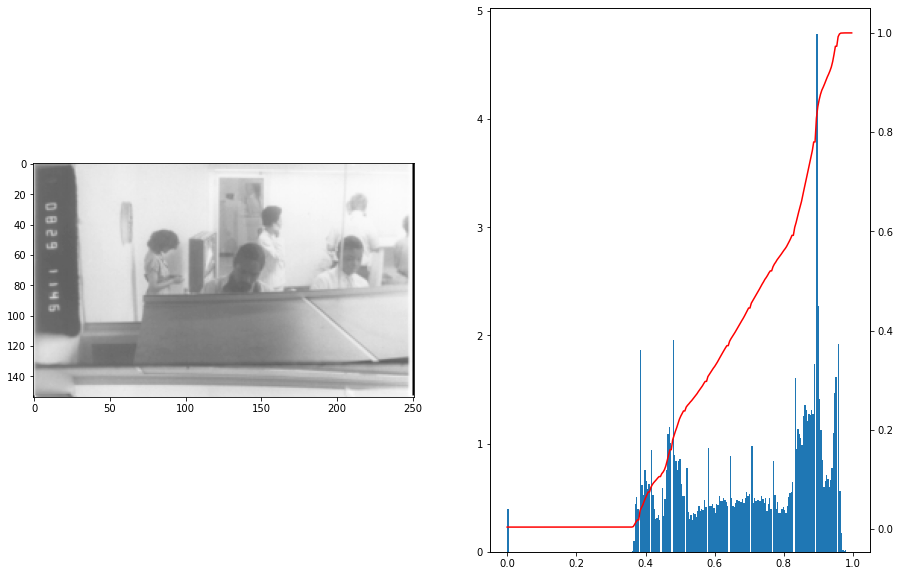

In [22]:
im = imageio.imread('data/BANKVID.TIF')
plot_histogram(im, 255)

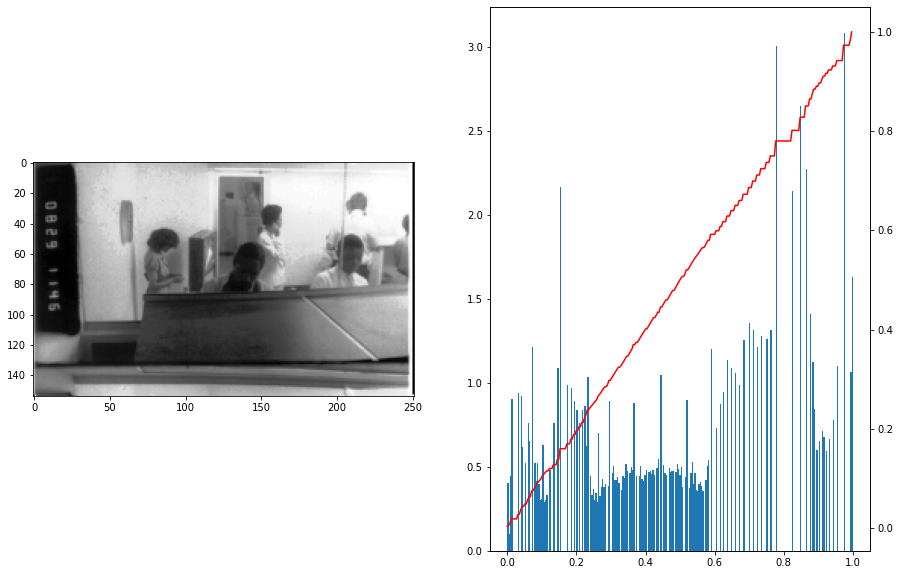

In [23]:
# Ecualización del histograma
def equalize(hist, im):
    cdf = hist.cumsum()
    norm_cdf = cdf/cdf.max()
    cdf_eq = np.ma.masked_equal(cdf,0)
    cdf_eq = (cdf_eq - cdf_eq.min())*255/(cdf_eq.max()-cdf_eq.min())
    im_eq = np.ma.filled(cdf_eq,0)[im]
    return im_eq

hist,_ = image_histogram(im, 255)
plot_histogram(equalize(hist, im), 255)

## Ejercicio 8

¿En qué casos aplicaría la ecualización del histograma?

---

En casos donde los valores del histograma están concentrados en una misma región, aplicando una ecualización se distribuirían de manera más uniforme y la imagen sería más entendible.

## Ejercicio 9
A partir de la siguiente imagen y su correspondiente histograma, indique y fundamente qué transformación en niveles de gris se aplicó en cada caso para obtener las imágenes A, B y C mostradas debajo. Describa cómo se realiza dicha transformación a partir de la imagen original, esquematice los histogramas resultantes y la transformación en nivel.

![](data/ej9.png)

---

* Imagen A: Estiramiento del contraste entre 0 y 1. Aprovechando todo el rango de intensidades de grís.
* Imagen B: Se aplicó un estiramiento del contraste con límites muy cercanos, yendo hacia 1. Terminando en una imagen más clara y con menos contraste.
* Imagen C: Claramente se aplicó un filtro negativo. Lo cual resulta en el reflejo del histograma.